# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [2]:
# read the titanic train.csv file into a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')

In [3]:
# show the percentage of the passengers that boarded at different ports
embark_percent = df['Embarked'].value_counts(normalize=True) * 100
embark_percent

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

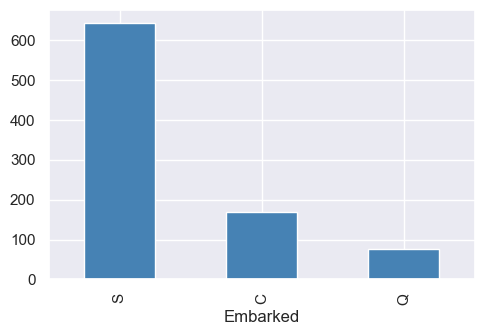

In [4]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
embark_counts = df['Embarked'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(5.5, 3.5))
embark_counts.plot(kind='bar', color='steelblue')
plt.show()


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [5]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
# Calculate survival rate by gender
survival_rate = df.groupby('Sex')['Survived'].mean() * 100
survival_rate

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

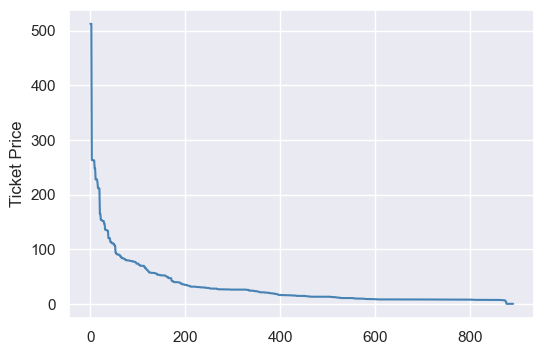

In [6]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below

sorted_prices = df['Fare'].sort_values(ascending=False).reset_index(drop=True)

sns.set(style="darkgrid")
plt.figure(figsize=(6,4))
plt.plot(sorted_prices, color='steelblue')
plt.ylabel('Ticket Price')
plt.show()



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



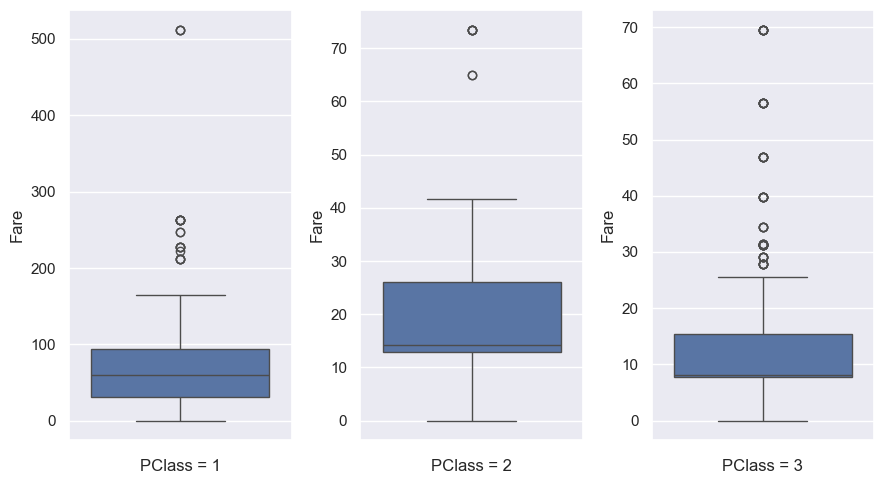

In [12]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
# Set figure with three subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

sns.set(style="darkgrid")
for i, cls in enumerate(df['Pclass'].unique(), start=-1):
    sns.boxplot(y=df[df['Pclass'] == cls]['Fare'], ax=ax[i])
    ax[i].set_xlabel(f'PClass = {cls}')
    ax[i].set_ylabel('Fare')

plt.tight_layout()
plt.show()

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [8]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function

class_survival_rate = df.groupby('Pclass')['Survived'].mean() * 100
print(class_survival_rate)
highest_survival_class = class_survival_rate.idxmax()
highest_rate = class_survival_rate.max()
print(f"For people with ticket class {highest_survival_class}, the survival rate is the highest, which is {highest_rate:.2f}%.")

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
For people with ticket class 1, the survival rate is the highest, which is 62.96%.


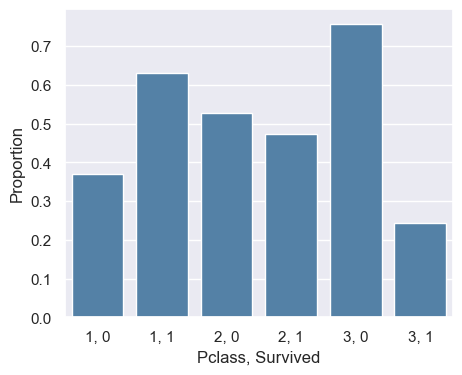

In [10]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below

class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_survival_proportions = class_survival_counts.div(class_survival_counts.sum(axis=1), axis=0) * 100
class_survival_proportions = class_survival_proportions.stack().reset_index(name='Proportion')
class_survival_proportions['Class_Survival'] ="()"+ class_survival_proportions['Pclass'].astype(str) + ', ' + class_survival_proportions['Survived'].astype(str)+")"

class_survival_proportions = class_survival_proportions[['Class_Survival', 'Proportion']]
class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_survival_proportions = class_survival_counts.div(class_survival_counts.sum(axis=1), axis=0)

class_survival_proportions = class_survival_proportions.stack().reset_index(name='Proportion')
class_survival_proportions['Class_Survival'] = class_survival_proportions['Pclass'].astype(str) + ', ' + class_survival_proportions['Survived'].astype(str)
class_survival_proportions = class_survival_proportions[['Class_Survival', 'Proportion']]

sns.set(style="darkgrid")
plt.figure(figsize=(5, 4))
sns.barplot(x='Class_Survival', y='Proportion', data=class_survival_proportions, color = "steelblue")
plt.xlabel('Pclass, Survived')
plt.show()



![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
